# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install plot_keras_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'plot_keras_history' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'plot_keras_history'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.39-py3-none-any.whl size=10630 sha256=f7340d81c3edea652246ec3b7bb972e2053258ec2cc03a19081daa3ee0d4cd50
  Stored in directory: /home/cypher/.cache/pip/wheels/56/8d/d7/bd70289b1bd192664225cd608fd08437ecc725c3f8918383d9
  DEPRECATION: Building 'sanitize_ml_labels' using the legacy setup.py bdist_wheel mechanism, which will be 

In [28]:
!pip install np_utils

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'np_utils' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'np_utils'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56351 sha256=4d856bcec254d188f16163db849736beeac3bba8980d255fb9d9ec5de188a003
  Stored in directory: /home/cypher/.cache/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


# Data

In [29]:
#df = pd.read_csv(r"D:\Heart disease prediction\dataset\Heart_Disease_Prediction.csv")
df = pd.read_csv("./data/Heart_Disease_Prediction.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       270 non-null    int64  
 1   Sex       270 non-null    int64  
 2   CP        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   Chol      270 non-null    int64  
 5   FBS       270 non-null    int64  
 6   restECG   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  Ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  num       270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [31]:
df.head()

,Age,Sex,CP,trestbps,Chol,FBS,restECG,thalach,exang,oldpeak,slope,Ca,thal,num
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [32]:
df.describe()

,Age,Sex,CP,trestbps,Chol,FBS,restECG,thalach,exang,oldpeak,slope,Ca,thal,num
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [33]:
df.shape

(270, 14)

In [34]:
# Checking for missing values.
df.isnull().values.any()

False

In [35]:
# Checking for imbalanced data based on sex.
df['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

In [36]:
# Checking for imbalanced data based on outcome.
df['num'].value_counts()

num
0    150
1    120
Name: count, dtype: int64

In [37]:
# Checking for any correlations.
df.corr()

,Age,Sex,CP,trestbps,Chol,FBS,restECG,thalach,exang,oldpeak,slope,Ca,thal,num
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
CP,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
trestbps,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
restECG,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
thalach,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
exang,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [38]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [39]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [40]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

9.746794344808963

In [41]:
accuracies = []
precisions = []
recalls = []
AUCs = []

# Decision Tree

In [42]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0])

Accuracy: 0.6526315789473685
Precision: 0.5714285714285714
Recall: 0.7
AUC: 0.6590909090909091
[[34 21]
 [12 28]]


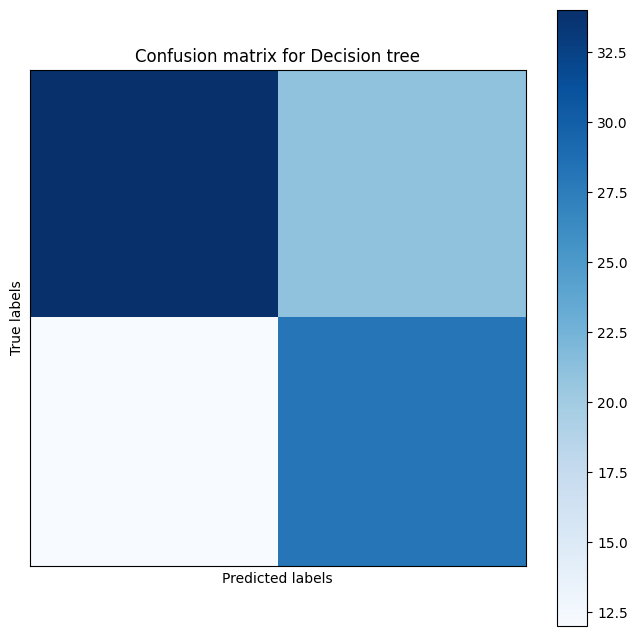

In [43]:
accuracy_dt = accuracy_score(y_test, y_pred) 
precision_dt = precision_score(y_test, y_pred) 
recall_dt = recall_score(y_test, y_pred) 
auc_dt = roc_auc_score(y_test, y_pred)
accuracies.append(accuracy_dt)
precisions.append(precision_dt)
recalls.append(recall_dt)
AUCs.append(auc_dt) 
print("Accuracy:", accuracy_dt) 
print("Precision:", precision_dt) 
print("Recall:", recall_dt) 
print("AUC:", auc_dt)

cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8,8)) 
plt.imshow(cm, cmap="Blues") 
plt.xlabel("Predicted labels") 
plt.ylabel("True labels") 
plt.xticks([], []) 
plt.yticks([], []) 
plt.title("Confusion matrix for Decision tree") 
plt.colorbar() 

# SVM Model

In [44]:
# Creating SVM model.
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [45]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0])

Accuracy: 0.7684210526315789
Precision: 0.725
Recall: 0.725
AUC: 0.7625000000000001
[[44 11]
 [11 29]]


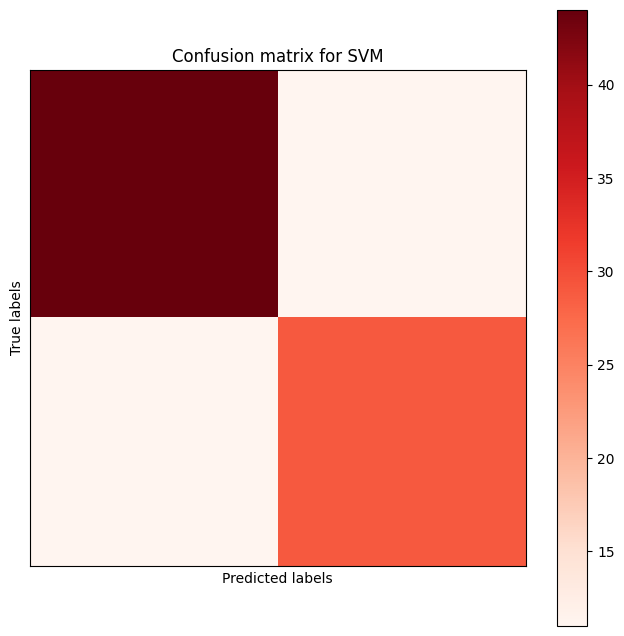

In [46]:
accuracy_svm = accuracy_score(y_test, y_pred) 
precision_svn = precision_score(y_test, y_pred) 
recall_svm = recall_score(y_test, y_pred) 
auc_svm = roc_auc_score(y_test, y_pred)
accuracies.append(accuracy_svm)
precisions.append(precision_svn)
recalls.append(recall_svm)
AUCs.append(auc_svm) 
print("Accuracy:", accuracy_svm) 
print("Precision:", precision_svn) 
print("Recall:", recall_svm) 
print("AUC:", auc_svm)

cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8,8)) 
plt.imshow(cm, cmap="Reds") 
plt.xlabel("Predicted labels") 
plt.ylabel("True labels") 
plt.xticks([], []) 
plt.yticks([], []) 
plt.title("Confusion matrix for SVM") 
plt.colorbar() 

# Random Forest Model

In [47]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

Accuracy: 0.8210526315789474
Precision: 0.7674418604651163
Recall: 0.825
AUC: 0.8215909090909089
[[45 10]
 [ 7 33]]


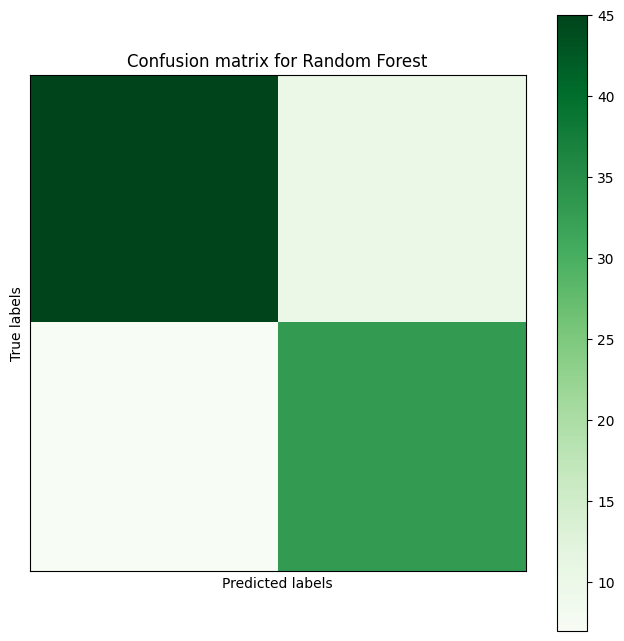

In [48]:
accuracy_rf = accuracy_score(y_test, y_pred) 
precision_rf = precision_score(y_test, y_pred) 
recall_rf = recall_score(y_test, y_pred) 
auc_rf = roc_auc_score(y_test, y_pred)
accuracies.append(accuracy_rf)
precisions.append(precision_rf)
recalls.append(recall_rf)
AUCs.append(auc_rf) 
print("Accuracy:", accuracy_rf) 
print("Precision:", precision_rf) 
print("Recall:", recall_rf) 
print("AUC:", auc_rf)

cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8,8)) 
plt.imshow(cm, cmap="Greens") 
plt.xlabel("Predicted labels") 
plt.ylabel("True labels") 
plt.xticks([], []) 
plt.yticks([], []) 
plt.title("Confusion matrix for Random Forest") 
plt.colorbar() 

# Logistic Regression

In [49]:
model = LogisticRegression() 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Accuracy: 0.7789473684210526
Precision: 0.7111111111111111
Recall: 0.8
AUC: 0.781818181818182
[[42 13]
 [ 8 32]]


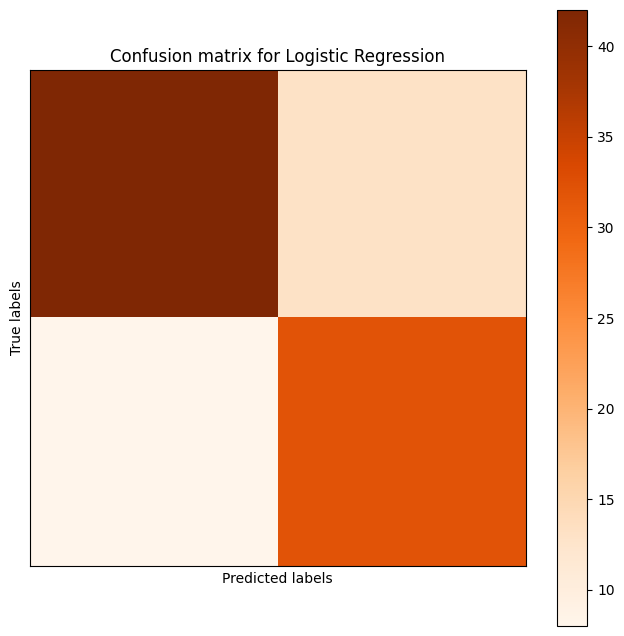

In [50]:
accuracy_lr = accuracy_score(y_test, y_pred) 
precision_lr = precision_score(y_test, y_pred) 
recall_lr = recall_score(y_test, y_pred) 
auc_lr = roc_auc_score(y_test, y_pred)
accuracies.append(accuracy_lr)
precisions.append(precision_lr)
recalls.append(recall_lr)
AUCs.append(auc_lr) 
print("Accuracy:", accuracy_lr) 
print("Precision:", precision_lr) 
print("Recall:", recall_lr) 
print("AUC:", auc_lr)

cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8,8)) 
plt.imshow(cm, cmap="Oranges") 
plt.xlabel("Predicted labels") 
plt.ylabel("True labels") 
plt.xticks([], []) 
plt.yticks([], []) 
plt.title("Confusion matrix for Logistic Regression") 
plt.colorbar() 

# Deep Learning Models

In [51]:
print (x_train.shape) 

(175, 12)


In [53]:
# convert the data to categorical labels
from keras.utils import to_categorical 

Y_train = to_categorical(y_train, num_classes=None) 
Y_test = to_categorical(y_test, num_classes=None) 

print (Y_train.shape) 
print (y_train[:10])

(175, 2)
4      0
150    0
61     1
67     1
52     0
66     0
26     0
205    0
212    0
122    1
Name: num, dtype: int64


# ANN

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from plot_keras_history import plot_history

In [87]:
def p_m(history, num_epochs):
   accuracy = history.history['accuracy']
   precision = history.history['Precision']
   recall = history.history['Recall']
   auc = history.history['AUC']
   i = num_epochs-1
   performance_metrics = [accuracy[i], precision[i], recall[i], auc[i]]
   print(performance_metrics)
   plot_history(history, path="standard.png")
   return performance_metrics

In [88]:
from sklearn.model_selection import learning_curve


def ANN():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=12, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    # adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy','Precision','Recall','AUC'])
    return model

model = ANN()

print(model.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362 (1.41 KB)

 Trainable params: 362 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [89]:
# fit the model to the training data
ANN_history=model.fit(x_train, Y_train, validation_data=(x_test,Y_test),epochs=100, batch_size=10)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 0.6681 - Precision: 0.5982 - Recall: 0.5982 - accuracy: 0.5982 - loss: 0.6713 - val_AUC: 0.7446 - val_Precision: 0.5789 - val_Recall: 0.5789 - val_accuracy: 0.5789 - val_loss: 0.6533
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6486 - Precision: 0.5029 - Recall: 0.5029 - accuracy: 0.5029 - loss: 0.6591 - val_AUC: 0.7574 - val_Precision: 0.5789 - val_Recall: 0.5789 - val_accuracy: 0.5789 - val_loss: 0.6288
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.7552 - Precision: 0.5821 - Recall: 0.5821 - accuracy: 0.5821 - loss: 0.6170 - val_AUC: 0.7732 - val_Precision: 0.6842 - val_Recall: 0.6842 - val_accuracy: 0.6842 - val_loss: 0.6065
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7596 - Precision: 0.6865 - Recall: 0.6865 - accuracy: 0.6865 - loss: 0.5897 - val_AUC: 0.7884 - val_Precision: 0.7368 - val_Recall: 0.7368 - val_accuracy: 0.7368 - val_loss: 0.5797
Epoch 5/100
18/18 ━━━━━━━━━━━━━━

In [90]:
print(ANN_history.history.keys())


dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


[0.8971428275108337, 0.8971428275108337, 0.8971428275108337, 0.9614040851593018]


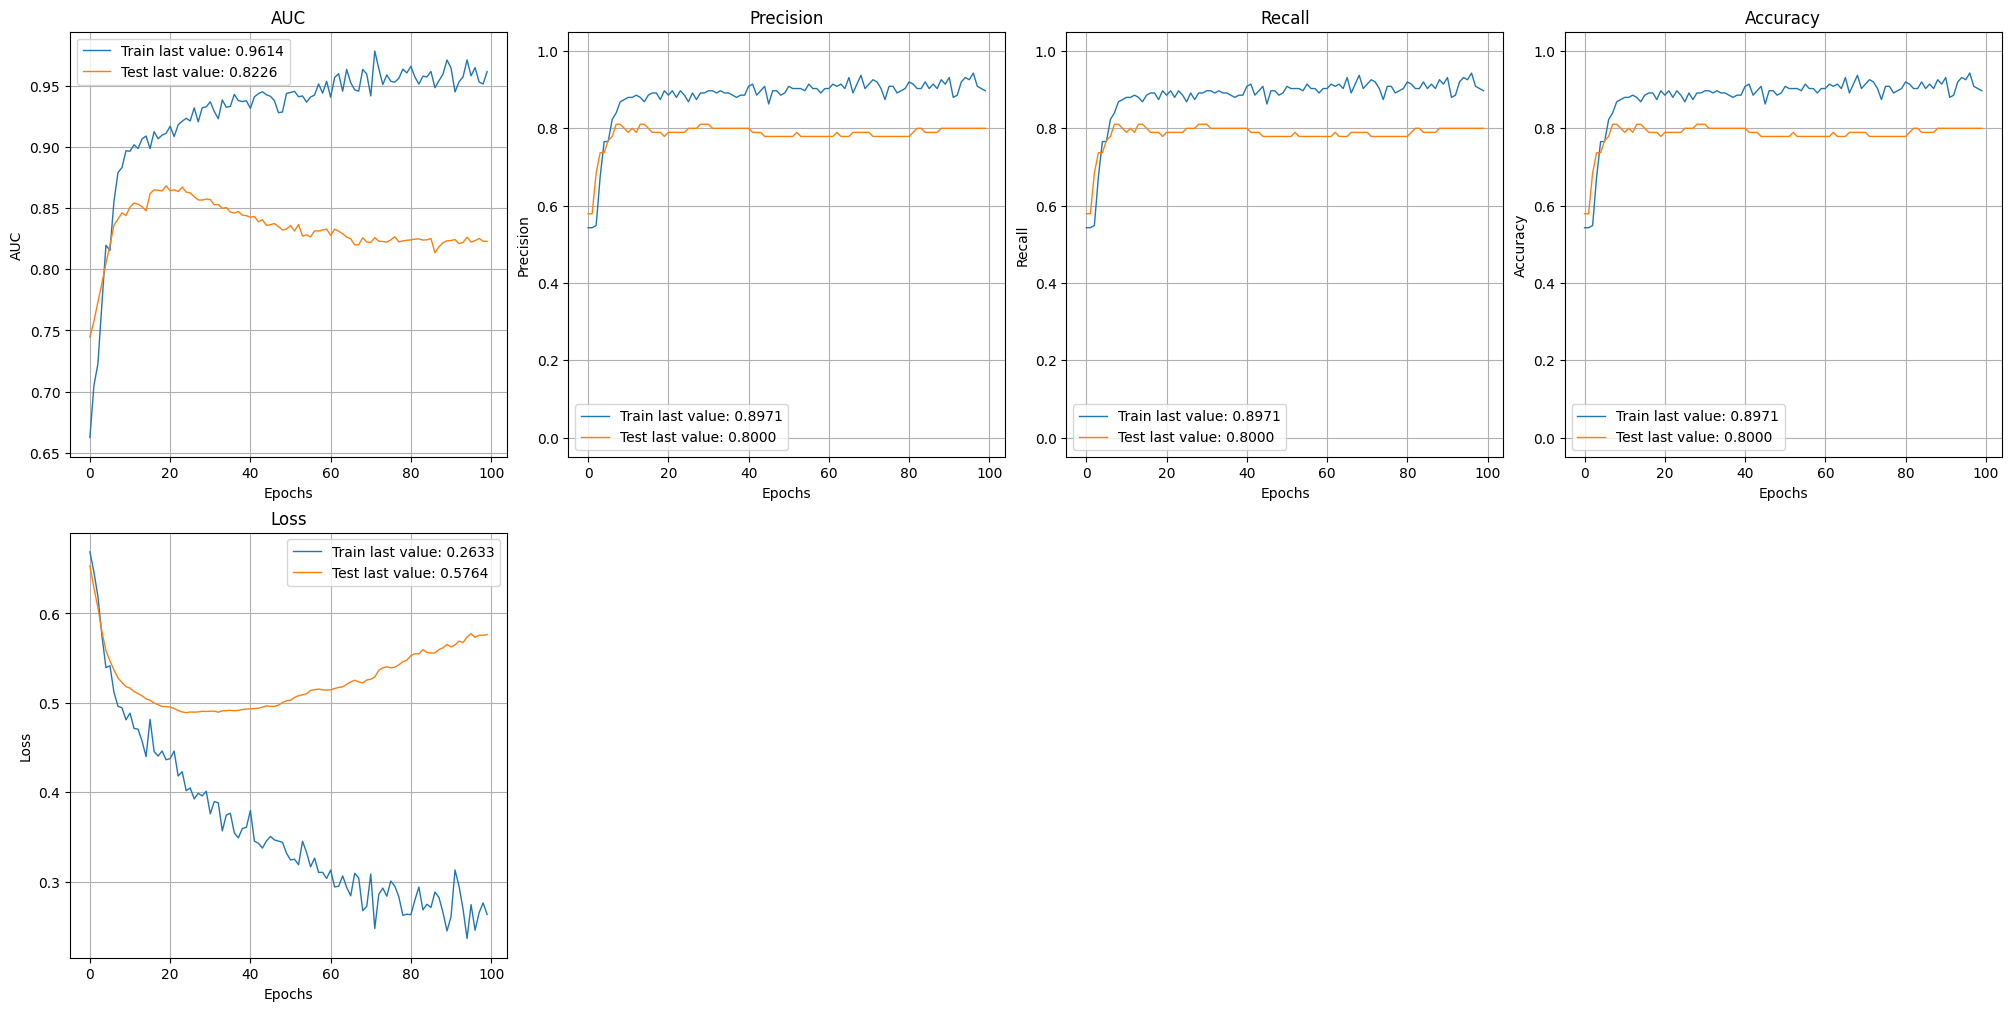

In [91]:
num_epochs = 100
ANN_perf = p_m(ANN_history, num_epochs)

In [92]:
accuracies.append(ANN_perf[0])
precisions.append(ANN_perf[1])
recalls.append(ANN_perf[2])
AUCs.append(ANN_perf[3])

# FNN

In [93]:
# Define the model
model = Sequential()
# Add input layer and first hidden layer
model.add(Dense(64, input_shape=(12,), activation='relu'))
# Add additional hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# Add output layer
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [94]:
# fit the model to the training data
FNN_history=model.fit(x_train, Y_train, validation_data=(x_test,Y_test),epochs=30, batch_size=10)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 0.7429 - Precision: 0.6839 - Recall: 0.6839 - accuracy: 0.6839 - loss: 0.5955 - val_AUC: 0.8112 - val_Precision: 0.7579 - val_Recall: 0.7579 - val_accuracy: 0.7579 - val_loss: 0.5663
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.9084 - Precision: 0.8770 - Recall: 0.8770 - accuracy: 0.8770 - loss: 0.4599 - val_AUC: 0.8252 - val_Precision: 0.8105 - val_Recall: 0.8105 - val_accuracy: 0.8105 - val_loss: 0.5330
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.9211 - Precision: 0.8986 - Recall: 0.8986 - accuracy: 0.8986 - loss: 0.3881 - val_AUC: 0.8260 - val_Precision: 0.7895 - val_Recall: 0.7895 - val_accuracy: 0.7895 - val_loss: 0.5184
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.9510 - Precision: 0.9175 - Recall: 0.9175 - accuracy: 0.9175 - loss: 0.3010 - val_AUC: 0.8223 - val_Precision: 0.7789 - val_Recall: 0.7789 - val_accuracy: 0.7789 - val_loss: 0.5263
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━

[0.9885714054107666, 0.9885714054107666, 0.9885714054107666, 0.9994122982025146]


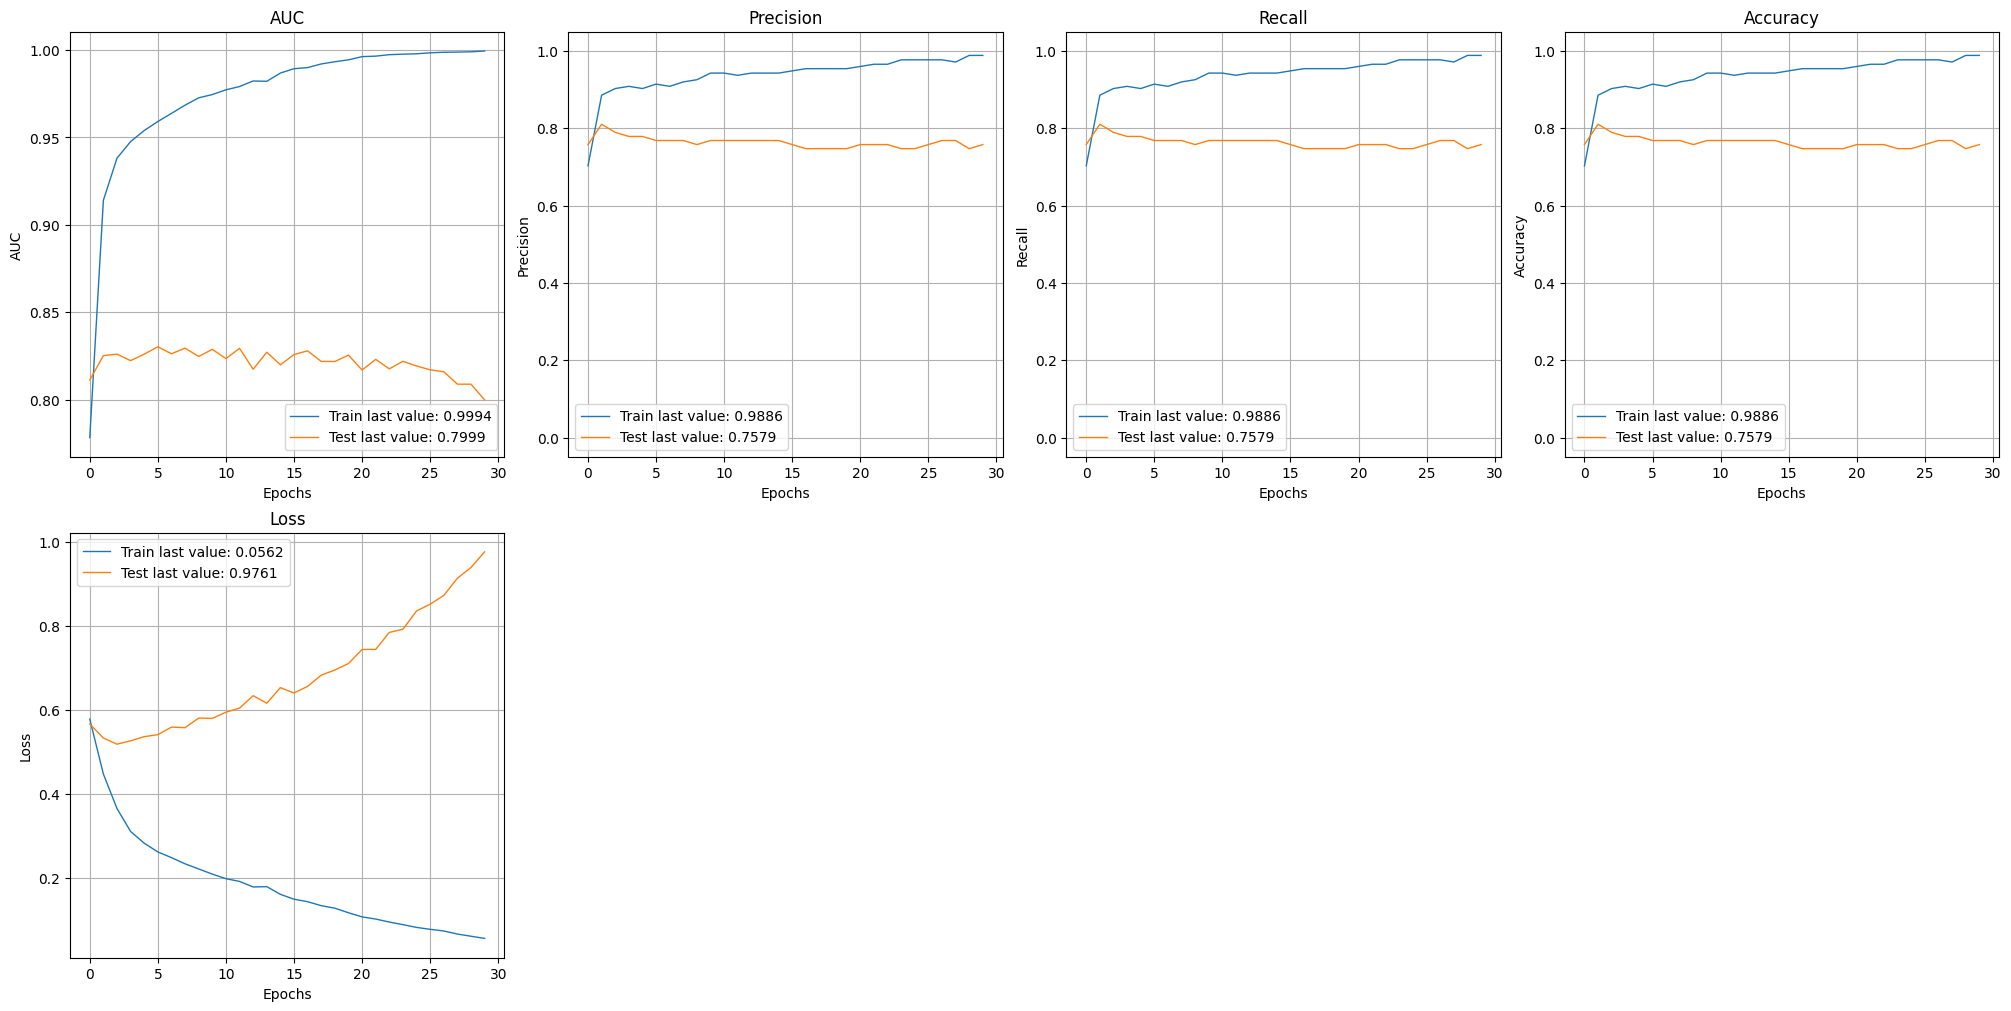

In [95]:
num_epochs = 30
FNN_perf = p_m(FNN_history, num_epochs)

In [96]:
accuracies.append(FNN_perf[0])
precisions.append(FNN_perf[1])
recalls.append(FNN_perf[2])
AUCs.append(FNN_perf[3])

# GRU

In [97]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense

# Reshape input data
x_train_re = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the model
model = Sequential()
# Add GRU layer
model.add(GRU(64, input_shape=(x_train_re.shape[1], 1)))
# Add dense layer
model.add(Dense(32, activation='relu'))
# Add output layer
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [98]:
# fit the model to the training data
GRU_history=model.fit(x_train, Y_train, validation_data=(x_test,Y_test),epochs=100, batch_size=10)

Epoch 1/100


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - AUC: 0.8673 - Precision: 0.8488 - Recall: 0.8488 - accuracy: 0.8488 - loss: 0.6272 - val_AUC: 0.7663 - val_Precision: 0.6947 - val_Recall: 0.6947 - val_accuracy: 0.6947 - val_loss: 0.5955
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.9002 - Precision: 0.8558 - Recall: 0.8558 - accuracy: 0.8558 - loss: 0.5013 - val_AUC: 0.7902 - val_Precision: 0.7158 - val_Recall: 0.7158 - val_accuracy: 0.7158 - val_loss: 0.5558
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.8917 - Precision: 0.8299 - Recall: 0.8299 - accuracy: 0.8299 - loss: 0.4249 - val_AUC: 0.7699 - val_Precision: 0.7263 - val_Recall: 0.7263 - val_accuracy: 0.7263 - val_loss: 0.5958
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.9083 - Precision: 0.8515 - Recall: 0.8515 - accuracy: 0.8515 - loss: 0.3844 - val_AUC: 0.7715 - val_Precision: 0.7158 - val_Recall: 0.7158 - val_accuracy: 0.7158 - val_loss: 0.6051
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21

[0.9828571677207947, 0.9828571677207947, 0.9828571677207947, 0.9989061951637268]


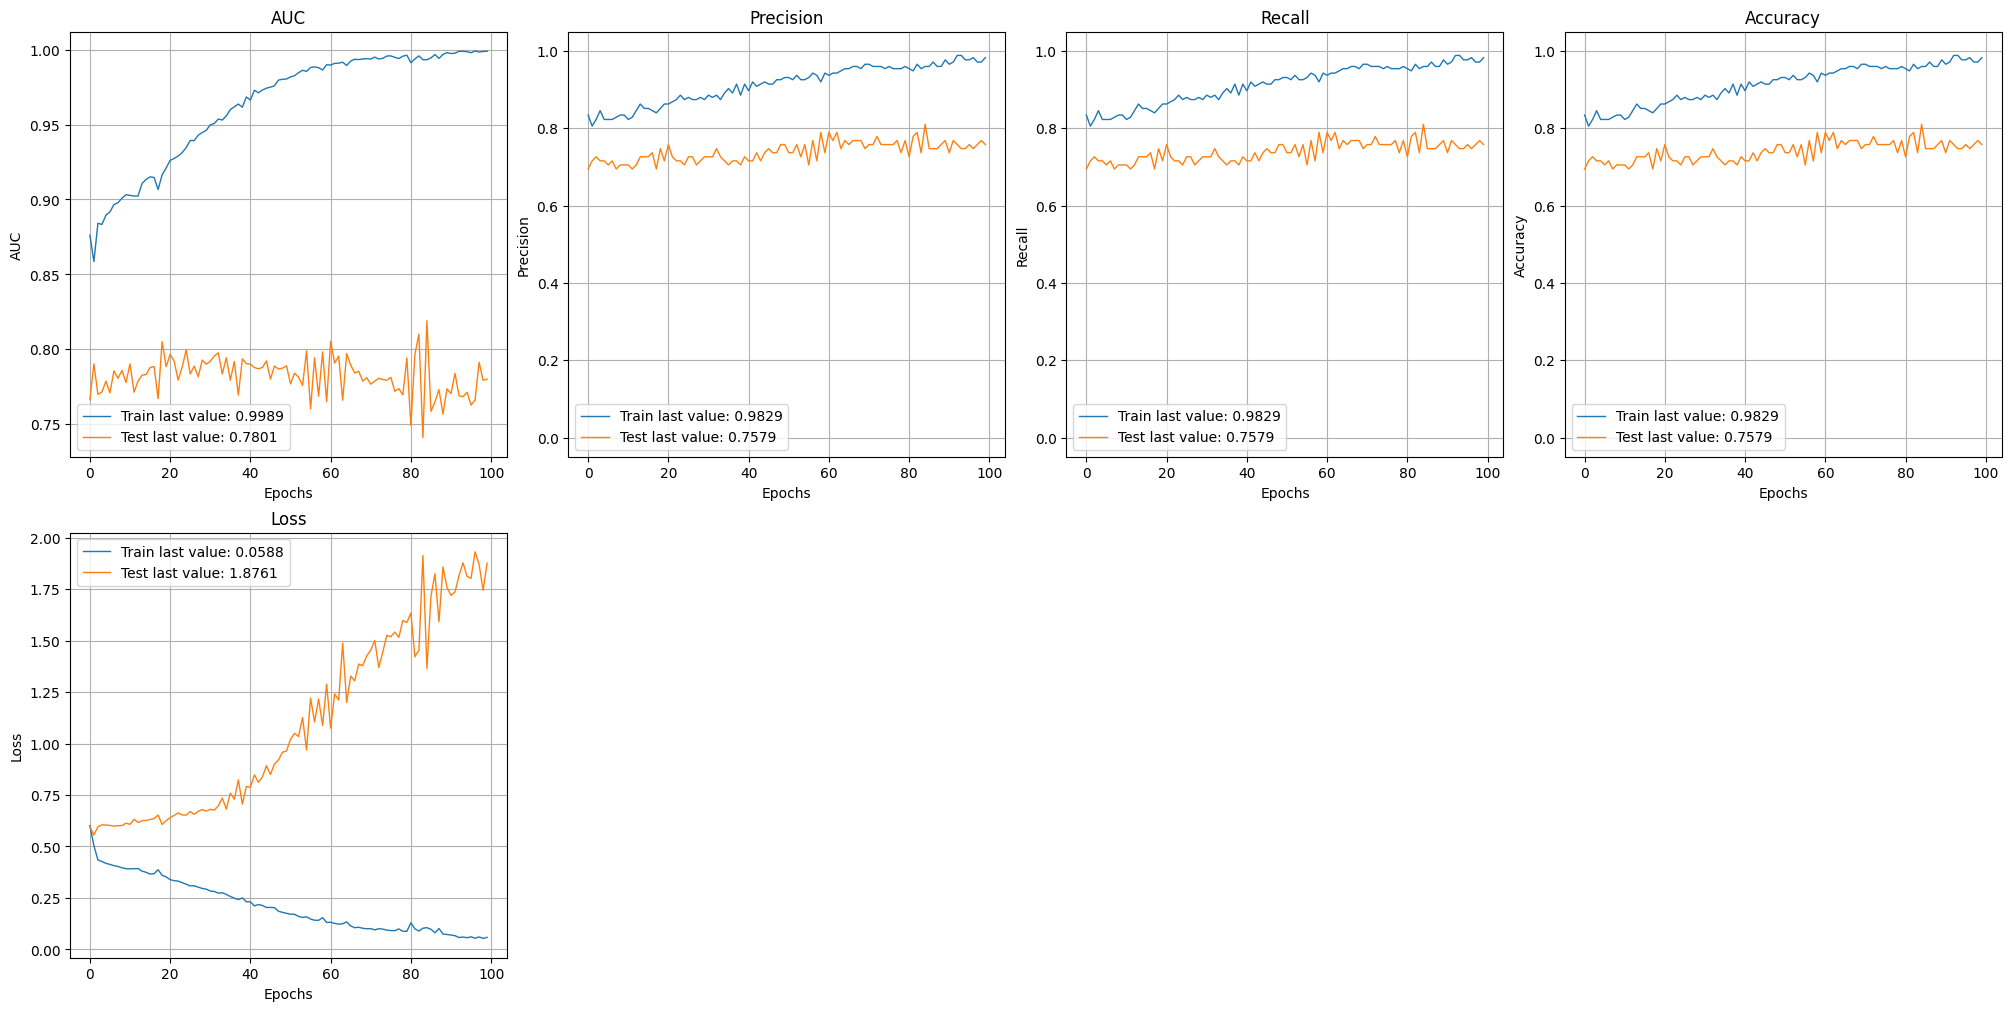

In [100]:
num_epochs = 100
GRU_perf = p_m(GRU_history, num_epochs)

In [101]:
accuracies.append(GRU_perf[0])
precisions.append(GRU_perf[1])
recalls.append(GRU_perf[2])
AUCs.append(GRU_perf[3])

# LSTM

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
import pickle

In [103]:
# Define hyperparameters
learning_rate = 0.001
batch_size = 50
num_epochs = 300

In [104]:

def LSTM(X_train):
  classifier = tf.keras.Sequential()
    # Must define the input shape in the first layer of the neural network
  classifier.add(tf.keras.layers.LSTM(units=128, input_shape=(X_train.shape[1], 1)))
  classifier.add(tf.keras.layers.Dropout(0.2))
  #classifier.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
  #classifier.add(Dense(units=1))
  classifier.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
  classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=["accuracy","AUC","Precision","Recall"]) 
  return classifier


model = LSTM(x_train)

In [105]:
# fit the model to the training data
LSTM_history=model.fit(x_train, Y_train, validation_data=(x_test,Y_test),epochs=100, batch_size=10)

Epoch 1/100


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - AUC: 0.7304 - Precision: 0.6626 - Recall: 0.7350 - accuracy: 0.6674 - loss: 0.6654 - val_AUC: 0.8046 - val_Precision: 0.7766 - val_Recall: 0.7684 - val_accuracy: 0.7684 - val_loss: 0.5646
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.8257 - Precision: 0.7686 - Recall: 0.7724 - accuracy: 0.7646 - loss: 0.5213 - val_AUC: 0.7966 - val_Precision: 0.6809 - val_Recall: 0.6737 - val_accuracy: 0.6737 - val_loss: 0.5427
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.7829 - Precision: 0.7039 - Recall: 0.7099 - accuracy: 0.7017 - loss: 0.5601 - val_AUC: 0.7900 - val_Precision: 0.6702 - val_Recall: 0.6632 - val_accuracy: 0.6632 - val_loss: 0.5487
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8419 - Precision: 0.7913 - Recall: 0.7913 - accuracy: 0.7913 - loss: 0.4924 - val_AUC: 0.7869 - val_Precision: 0.6702 - val_Recall: 0.6632 - val_accuracy: 0.6737 - val_loss: 0.5502
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26

[0.977142870426178, 0.9714285731315613, 0.9714285731315613, 0.9976162910461426]


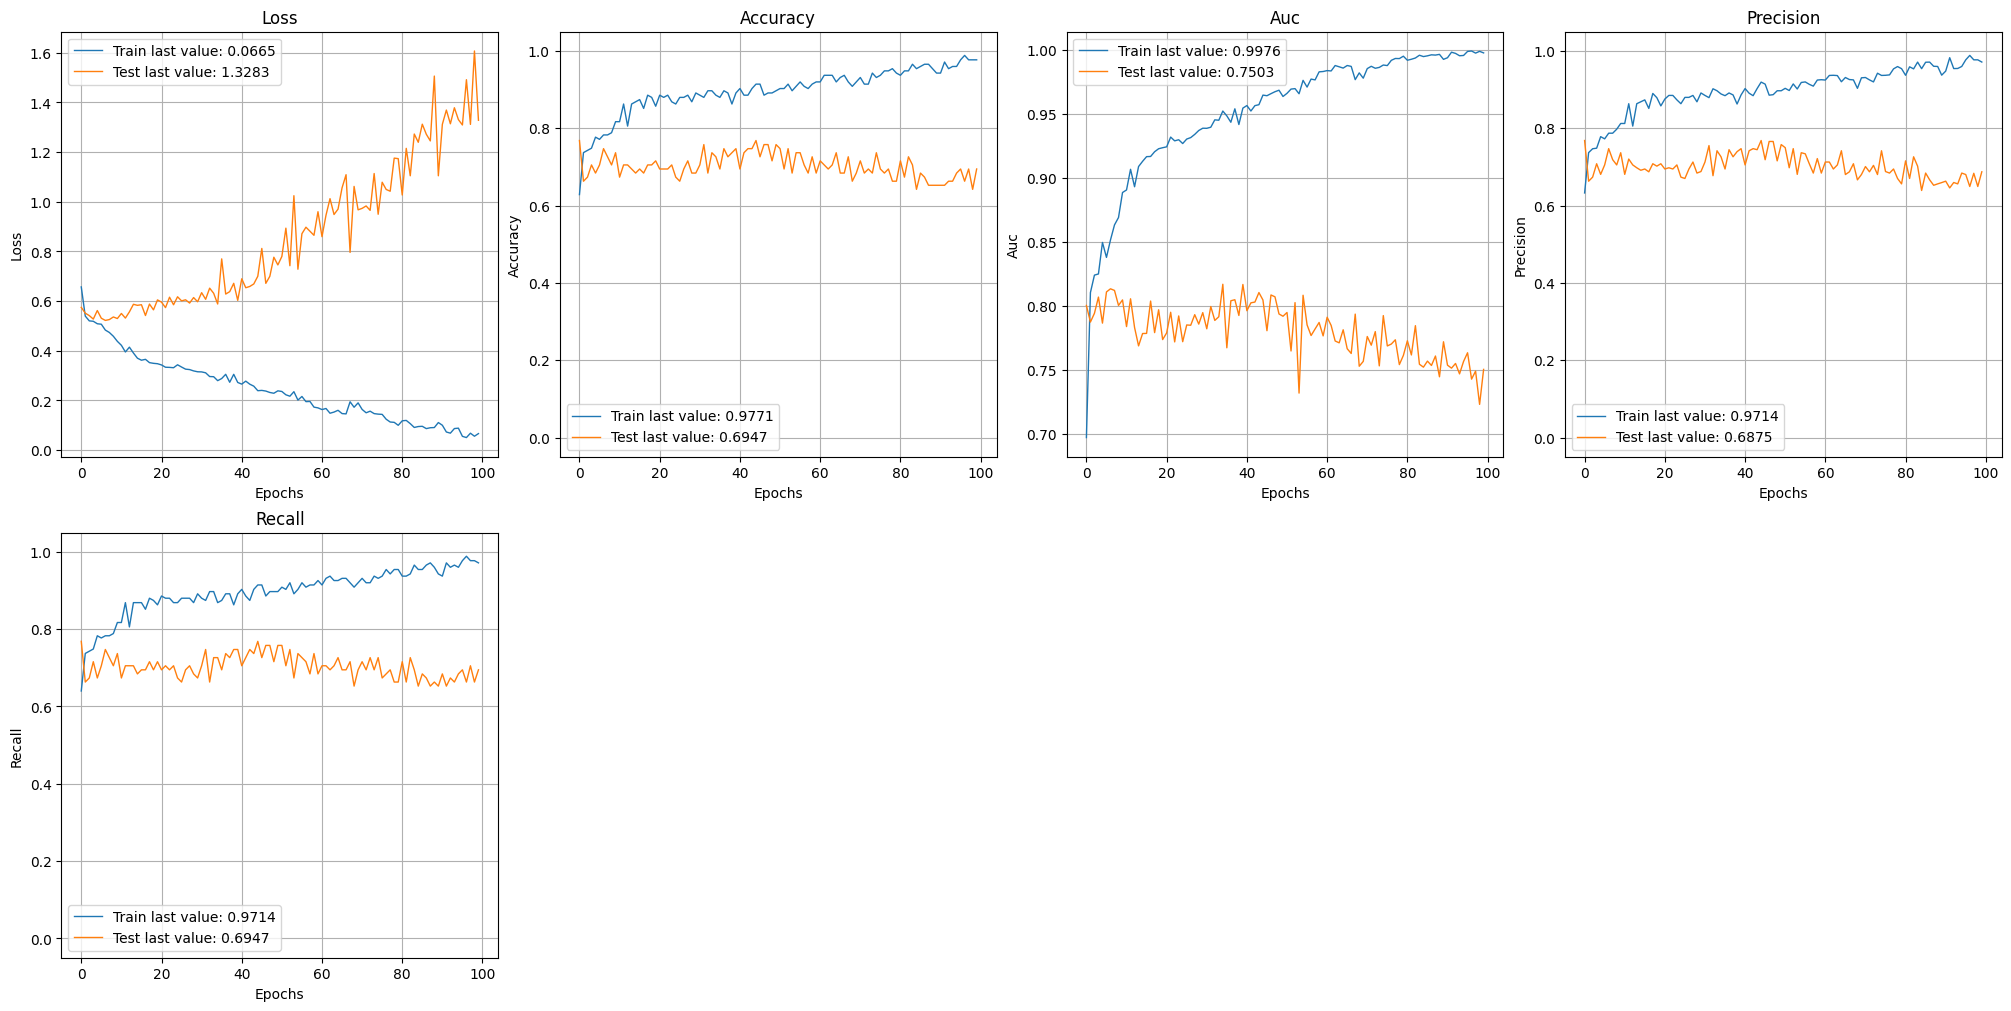

In [49]:
LSTM_perf = p_m(LSTM_history, 100)

In [106]:
accuracies.append(LSTM_perf[0])
precisions.append(LSTM_perf[1])
recalls.append(LSTM_perf[2])
AUCs.append(LSTM_perf[3])

NameError: name 'LSTM_perf' is not defined

In [ ]:
names = ["DT", "SVM", "RF", "LR", "ANN", "FNN", "GRU", "LSTM"]
classification_results = pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall":recalls,
    "AUC":AUCs
})
classification_results.index = names
classification_results

,Accuracy,Precision,Recall,AUC
DT,0.642105,0.560000,0.700000,0.650000
SVM,0.768421,0.725000,0.725000,0.762500
RF,0.821053,0.767442,0.825000,0.821591
LR,0.778947,0.711111,0.800000,0.781818
ANN,0.902857,0.902857,0.902857,0.958465
FNN,1.000000,1.000000,1.000000,1.000000
GRU,0.937143,0.937143,0.937143,0.991249
LSTM,0.977143,0.971429,0.971429,0.997616


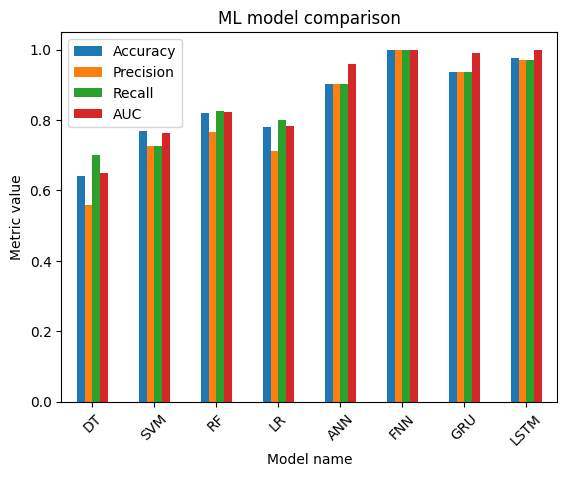

In [ ]:
# plot a bar graph for each column
ax = classification_results.plot.bar(rot=45)

# set the title and labels
ax.set_title("ML model comparison")
ax.set_xlabel("Model name")
ax.set_ylabel("Metric value")

# show the plot
plt.show()